# Basic Sequences Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tf.data.Dataset(variant_tensor)
# : Represents a potentially large set of elements.
# www.tensorflow.org/api_docs/python/tf/data/Dataset

dataset = tf.data.Dataset.range(10)
print(dataset)
print(type(dataset))  # RangeDataset 객체
for val in dataset:
    print(val.numpy(),val)  # val : Tensor객체

<RangeDataset shapes: (), types: tf.int64>
<class 'tensorflow.python.data.ops.dataset_ops.RangeDataset'>
0 tf.Tensor(0, shape=(), dtype=int64)
1 tf.Tensor(1, shape=(), dtype=int64)
2 tf.Tensor(2, shape=(), dtype=int64)
3 tf.Tensor(3, shape=(), dtype=int64)
4 tf.Tensor(4, shape=(), dtype=int64)
5 tf.Tensor(5, shape=(), dtype=int64)
6 tf.Tensor(6, shape=(), dtype=int64)
7 tf.Tensor(7, shape=(), dtype=int64)
8 tf.Tensor(8, shape=(), dtype=int64)
9 tf.Tensor(9, shape=(), dtype=int64)


In [3]:
# window()메서드 를 풀어서 직접 구현할 경우 --> 매우 복잡함
size = 5
data = list(range(10))
print(data)   # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X = []
for i in range(len(data)):
    _X = data[i:size + i]
    X.insert(i,_X)
print(X)    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9], [6, 7, 8, 9], [7, 8, 9], [8, 9], [9]]


In [4]:
# dataset.window(size, shift=None, stride=1, drop_remainder=False)
# : Combines (nests of) input elements into a dataset of (nests of) windows.
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1)
print(dataset)
print(type(dataset))   # WindowDataset 객체
for window_dataset in dataset:   # 10회 반복
    # print(window_dataset)
    for val in window_dataset:   # 5회 반복
        print(val.numpy(),end=' ')
    #input()
    print()

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>
<class 'tensorflow.python.data.ops.dataset_ops.WindowDataset'>
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [5]:
# drop_remainder=True, window size보다 작은 windowed 된 데이터셋은 제거됨
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
for window_dataset in dataset:  
    for val in window_dataset:   
        print(val.numpy(),end=' ')
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [6]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.batch(3) # 10개의 데이터를 3개씩 나누어 결합
# print(type(dataset))
for val in dataset:
    print(val.numpy())

[0 1 2]
[3 4 5]
[6 7 8]
[9]


### Generator[참고]

In [7]:
# Generator
lines= ['package com.google.cloud.training.dataanalyst.javahelp;',
        'import org.apache.beam.sdk.Pipeline;',
        'import org.apache.beam.sdk.io.TextIO;',
        'import org.apache.beam.sdk.options.PipelineOptions;',
        'import org.apache.beam.sdk.options.PipelineOptionsFactory;',
        'import org.apache.beam.sdk.transforms.DoFn;',
        'import org.apache.beam.sdk.transforms.ParDo;' ]

keyword ='import'
def startsWith(line, term):
    # print('startsWith')
    if line.startswith(term):
        yield line
        
result = map(lambda line: startsWith(line, keyword),lines)
for k in result:
    print(list(k))

def len_line(line):
    return len(line)

# result = map(lambda line: len(line),lines)
result = map(len_line,lines)
for k in result:
    print(k)    

[]
['import org.apache.beam.sdk.Pipeline;']
['import org.apache.beam.sdk.io.TextIO;']
['import org.apache.beam.sdk.options.PipelineOptions;']
['import org.apache.beam.sdk.options.PipelineOptionsFactory;']
['import org.apache.beam.sdk.transforms.DoFn;']
['import org.apache.beam.sdk.transforms.ParDo;']
55
36
37
51
58
43
44


In [8]:
# lambda 함수
# lambda 인수1,인수2,... : 반환식
def add(a,b):
    return a + b

# print(add(10,20))
b = add
print(b(30,40))
l = lambda a,b: a + b
l(10,20)

70


30

In [9]:
# map()함수
def multi_two(x):
    print('multi_two is called!!')
    return x*2
# print(type(multi_two)) # <class 'function'>

ret = map(multi_two,[1,2,3,4,5]) # map 객체를 생성
print(type(ret))                 # <class 'map'>
# input()
print(list(ret))                 # list로 형 변환, map객체로 데이터 접근시에 함수가 실제 호출됨

<class 'map'>
multi_two is called!!
multi_two is called!!
multi_two is called!!
multi_two is called!!
multi_two is called!!
[2, 4, 6, 8, 10]


In [10]:
ret = map(lambda x:x*2,[1,2,3,4,5]) 
print(list(ret))                 

[2, 4, 6, 8, 10]


In [11]:
print(type(lambda x:x*2))

<class 'function'>


In [12]:
# flat_map(map_func)
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
print(dataset)
print('-'*50)
dataset = dataset.flat_map(lambda window:window.batch(5))
print(dataset)
for window in dataset:
    print(window.numpy())

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>
--------------------------------------------------
<FlatMapDataset shapes: (None,), types: tf.int64>
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [13]:
# map(map_func, num_parallel_calls=None, deterministic=None)
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda window:window.batch(5))
dataset = dataset.map(lambda window:(window[:-1],window[-1:]))
print(dataset)
for x,y in dataset:
    print(x.numpy(),y.numpy())

<MapDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [14]:
# shuffle(buffer_size, seed=None, reshuffle_each_iteration=None)
# buffer_size : 데이터 세트의 전체 크기보다 크거나 같은 버퍼 크기가 필요
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda window:window.batch(5))
dataset = dataset.map(lambda window:(window[:-1],window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
print(dataset)
for x,y in dataset:
    print(x.numpy(),y.numpy())

<ShuffleDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>
[2 3 4 5] [6]
[4 5 6 7] [8]
[5 6 7 8] [9]
[1 2 3 4] [5]
[0 1 2 3] [4]
[3 4 5 6] [7]


In [15]:
# prefetch(buffer_size)
# https://doubly8f.netlify.app/%EA%B0%9C%EB%B0%9C/2020/08/19/tf-loading-preprocessing-data/
# prefetch(1)을 호출하면 데이터셋은 항상 한 배치가 미리 준비되도록한다 
# 한 배치로 작업하는 동안 동시에 다음 배치를 준비한다
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5,shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda window:window.batch(5))
dataset = dataset.map(lambda window:(window[:-1],window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
print(dataset)
for x,y in dataset:
    print(x.numpy(),'\n',y.numpy())
    print('-'*10)

<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>
[[4 5 6 7]
 [0 1 2 3]] 
 [[8]
 [4]]
----------
[[5 6 7 8]
 [3 4 5 6]] 
 [[9]
 [7]]
----------
[[1 2 3 4]
 [2 3 4 5]] 
 [[5]
 [6]]
----------


### 데이터 생성 함수

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

(1461,) (1000,) (461,)


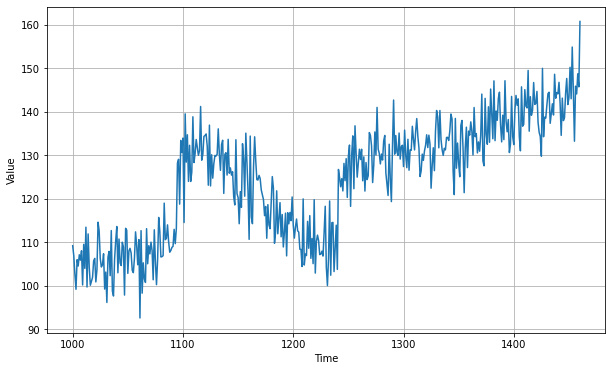

In [3]:
# 시각화
print(series.shape,x_train.shape,x_valid.shape)

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plt.show()

In [18]:
# from_tensor_slices()  : ndarray인 series객체를 각 요소를 Tensor 객체로 변환
dataset = tf.data.Dataset.from_tensor_slices(series)
print(type(dataset))  # TensorSliceDataset
for window in dataset:
    print(window)

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
tf.Tensor(32.48357, shape=(), dtype=float32)
tf.Tensor(29.395714, shape=(), dtype=float32)
tf.Tensor(33.40659, shape=(), dtype=float32)
tf.Tensor(37.858486, shape=(), dtype=float32)
tf.Tensor(29.14184, shape=(), dtype=float32)
tf.Tensor(29.20528, shape=(), dtype=float32)
tf.Tensor(38.32948, shape=(), dtype=float32)
tf.Tensor(34.322147, shape=(), dtype=float32)
tf.Tensor(28.183279, shape=(), dtype=float32)
tf.Tensor(33.283253, shape=(), dtype=float32)
tf.Tensor(28.287313, shape=(), dtype=float32)
tf.Tensor(28.303862, shape=(), dtype=float32)
tf.Tensor(31.864614, shape=(), dtype=float32)
tf.Tensor(21.104889, shape=(), dtype=float32)
tf.Tensor(22.057411, shape=(), dtype=float32)
tf.Tensor(27.875519, shape=(), dtype=float32)
tf.Tensor(25.622026, shape=(), dtype=float32)
tf.Tensor(32.25094, shape=(), dtype=float32)
tf.Tensor(26.127428, shape=(), dtype=float32)
tf.Tensor(23.588236, shape=(), dtype=float32)
tf.Tensor(37.95459

tf.Tensor(37.05561, shape=(), dtype=float32)
tf.Tensor(43.68034, shape=(), dtype=float32)
tf.Tensor(29.366863, shape=(), dtype=float32)
tf.Tensor(42.434345, shape=(), dtype=float32)
tf.Tensor(36.742188, shape=(), dtype=float32)
tf.Tensor(31.856117, shape=(), dtype=float32)
tf.Tensor(39.146954, shape=(), dtype=float32)
tf.Tensor(37.90466, shape=(), dtype=float32)
tf.Tensor(33.98134, shape=(), dtype=float32)
tf.Tensor(37.404633, shape=(), dtype=float32)
tf.Tensor(35.202393, shape=(), dtype=float32)
tf.Tensor(37.770016, shape=(), dtype=float32)
tf.Tensor(40.586697, shape=(), dtype=float32)
tf.Tensor(45.27987, shape=(), dtype=float32)
tf.Tensor(31.234583, shape=(), dtype=float32)
tf.Tensor(48.162838, shape=(), dtype=float32)
tf.Tensor(27.811369, shape=(), dtype=float32)
tf.Tensor(36.887154, shape=(), dtype=float32)
tf.Tensor(40.662064, shape=(), dtype=float32)
tf.Tensor(39.199963, shape=(), dtype=float32)
tf.Tensor(34.756157, shape=(), dtype=float32)
tf.Tensor(36.903816, shape=(), dtype=fl

tf.Tensor(40.583595, shape=(), dtype=float32)
tf.Tensor(37.03971, shape=(), dtype=float32)
tf.Tensor(40.706562, shape=(), dtype=float32)
tf.Tensor(38.32304, shape=(), dtype=float32)
tf.Tensor(51.96083, shape=(), dtype=float32)
tf.Tensor(47.730747, shape=(), dtype=float32)
tf.Tensor(43.08328, shape=(), dtype=float32)
tf.Tensor(50.326706, shape=(), dtype=float32)
tf.Tensor(43.12101, shape=(), dtype=float32)
tf.Tensor(38.238354, shape=(), dtype=float32)
tf.Tensor(49.9745, shape=(), dtype=float32)
tf.Tensor(44.871124, shape=(), dtype=float32)
tf.Tensor(36.811703, shape=(), dtype=float32)
tf.Tensor(40.871346, shape=(), dtype=float32)
tf.Tensor(37.27388, shape=(), dtype=float32)
tf.Tensor(34.57081, shape=(), dtype=float32)
tf.Tensor(45.952496, shape=(), dtype=float32)
tf.Tensor(50.70956, shape=(), dtype=float32)
tf.Tensor(34.014633, shape=(), dtype=float32)
tf.Tensor(43.671505, shape=(), dtype=float32)
tf.Tensor(37.456905, shape=(), dtype=float32)
tf.Tensor(38.132298, shape=(), dtype=float32

tf.Tensor(89.92866, shape=(), dtype=float32)
tf.Tensor(74.24374, shape=(), dtype=float32)
tf.Tensor(74.56036, shape=(), dtype=float32)
tf.Tensor(73.88528, shape=(), dtype=float32)
tf.Tensor(74.01205, shape=(), dtype=float32)
tf.Tensor(73.393845, shape=(), dtype=float32)
tf.Tensor(82.320206, shape=(), dtype=float32)
tf.Tensor(83.27507, shape=(), dtype=float32)
tf.Tensor(73.119415, shape=(), dtype=float32)
tf.Tensor(71.615204, shape=(), dtype=float32)
tf.Tensor(77.94125, shape=(), dtype=float32)
tf.Tensor(72.63366, shape=(), dtype=float32)
tf.Tensor(78.373535, shape=(), dtype=float32)
tf.Tensor(76.04119, shape=(), dtype=float32)
tf.Tensor(67.26922, shape=(), dtype=float32)
tf.Tensor(82.41057, shape=(), dtype=float32)
tf.Tensor(83.48135, shape=(), dtype=float32)
tf.Tensor(71.27087, shape=(), dtype=float32)
tf.Tensor(72.23311, shape=(), dtype=float32)
tf.Tensor(75.4418, shape=(), dtype=float32)
tf.Tensor(75.52976, shape=(), dtype=float32)
tf.Tensor(76.99938, shape=(), dtype=float32)
tf.Ten

tf.Tensor(102.885155, shape=(), dtype=float32)
tf.Tensor(110.176094, shape=(), dtype=float32)
tf.Tensor(111.60306, shape=(), dtype=float32)
tf.Tensor(110.313774, shape=(), dtype=float32)
tf.Tensor(107.13244, shape=(), dtype=float32)
tf.Tensor(107.22748, shape=(), dtype=float32)
tf.Tensor(107.91699, shape=(), dtype=float32)
tf.Tensor(106.78804, shape=(), dtype=float32)
tf.Tensor(112.17137, shape=(), dtype=float32)
tf.Tensor(118.23741, shape=(), dtype=float32)
tf.Tensor(104.23415, shape=(), dtype=float32)
tf.Tensor(100.01346, shape=(), dtype=float32)
tf.Tensor(106.26606, shape=(), dtype=float32)
tf.Tensor(119.4552, shape=(), dtype=float32)
tf.Tensor(102.391754, shape=(), dtype=float32)
tf.Tensor(114.46351, shape=(), dtype=float32)
tf.Tensor(114.51865, shape=(), dtype=float32)
tf.Tensor(103.22888, shape=(), dtype=float32)
tf.Tensor(108.71298, shape=(), dtype=float32)
tf.Tensor(113.88588, shape=(), dtype=float32)
tf.Tensor(103.72878, shape=(), dtype=float32)
tf.Tensor(126.695984, shape=(),

In [19]:
series

array([ 32.48357 ,  29.395714,  33.40659 , ..., 148.681   , 145.67987 ,
       160.70773 ], dtype=float32)

In [4]:
# 시계열 데이터 window 전처리 함수
def windowed_dataset(series,window_size,batch_size,shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1,shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window:window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer_size).map(lambda window:(window[:-1],window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [21]:
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)
print(dataset)
print('    X    ----   Y')
for x,y in dataset:
    print(x.numpy().shape,'----',y.numpy().shape)
    # print('-'*10)
    break

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
    X    ----   Y
(32, 20) ---- (32,)


In [22]:
# 모델 구현
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,input_shape=[window_size],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)   # 회귀모델
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9),
             loss='mse')
model.summary()

# https://tensorflow.blog/2017/03/22/momentum-nesterov-momentum/

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 학습
model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
31/31 [==============================] - 2s 53ms/step - loss: 72.9239
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 53.6498
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 51.7753
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 49.7220
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 49.4737
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 49.9121
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 48.2902
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 47.2596
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 46.9323
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 46.5114
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 46.4609
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 46.2218
Epoch 13/100
31/31 [====

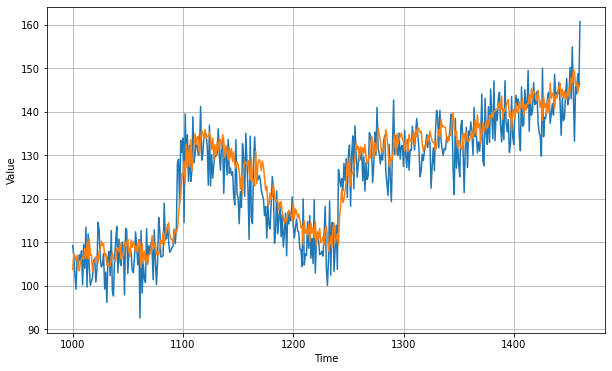

In [24]:
# 예측
forcast = []
for time in range(len(series) - window_size):  # 1441회 예측
    forcast.append(model.predict(series[time:time + window_size][np.newaxis]))
forcast = forcast[split_time - window_size:]    
results = np.array(forcast)[:,0,0]

# 시각화
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)  # 실제값
plot_series(time_valid,results)  # 예측값
plt.show()

In [25]:
# print(np.array(forcast).shape)  # (461, 1, 1)
# print(np.array(forcast)[:,0,0].shape) # (461,)

In [26]:
# series[0:0 + window_size].reshape(-1,20).shape
# series[0:0 + window_size][np.newaxis][np.newaxis].shape

In [27]:
# 평가
tf.keras.metrics.mean_absolute_error(x_valid,results).numpy() # 4.8642178

4.8642178

### LearningRateScheduler 사용

In [5]:
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,input_shape=[window_size],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)   # 회귀모델
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch:1e-8*10**(epoch/20))   # increase

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#         lambda epoch:1e-8*0.5**(epoch/20))   # decay

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9),
             loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [9]:
# func = lambda epoch:1e-8*10**(epoch/20)
# for epoch in range(100):
#     print(epoch,':',func(epoch))

In [6]:
# 학습
history = model.fit(dataset,epochs=100,callbacks=[lr_schedule],verbose=1)

Epoch 1/100
31/31 [==============================] - 2s 44ms/step - loss: 1082.2128 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 118.7237 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 102.2133 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 101.9004 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 101.0877 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 100.7249 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 100.2802 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 99.6706 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 99.0225 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 98.3443 - lr: 2.8184e-08
Epoch 11/1

(1e-08, 0.001, 0.0, 300.0)

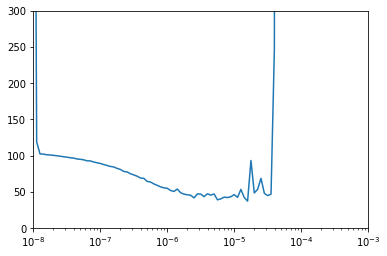

In [7]:
# 시각화
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [10]:
# [참고 소스]
dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,input_shape=[window_size],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)   # 회귀모델
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch:1e-8*0.5**(epoch/20))   # decay

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9),
             loss='mse')
model.summary()

# 학습
history = model.fit(dataset,epochs=100,callbacks=[lr_schedule],verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 788.9923 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 964us/step - loss: 137.6463 - lr: 9.6594e-09
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 101.1611 - lr: 9.3303e-09
Epoch 4/100
31/31 [==

(1e-08, 0.001, 0.0, 300.0)

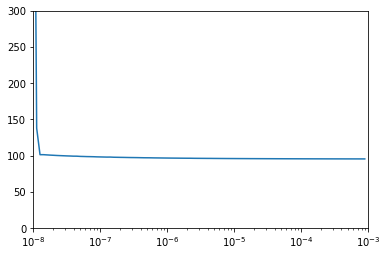

In [13]:
# 시각화
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

## 모델개선

In [14]:
window_size = 30   # 20 -----> 30

dataset = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,input_shape=[window_size],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)   
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9),
             loss='mse')
model.summary()

# 학습
history = model.fit(dataset,epochs=500,verbose=1)  # epochs : 100 ---> 500

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
31/31 [==============================] - 1s 2ms/step - loss: 159.4479
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 114.0176
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 99.3049
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 80

31/31 [==============================] - 0s 3ms/step - loss: 37.7938
Epoch 92/500
31/31 [==============================] - 0s 2ms/step - loss: 38.3923
Epoch 93/500
31/31 [==============================] - 0s 2ms/step - loss: 38.3449
Epoch 94/500
31/31 [==============================] - 0s 2ms/step - loss: 38.2551
Epoch 95/500
31/31 [==============================] - 0s 2ms/step - loss: 38.0617
Epoch 96/500
31/31 [==============================] - 0s 2ms/step - loss: 37.8619
Epoch 97/500
31/31 [==============================] - 0s 2ms/step - loss: 37.6008
Epoch 98/500
31/31 [==============================] - 0s 1ms/step - loss: 37.0776
Epoch 99/500
31/31 [==============================] - 0s 1ms/step - loss: 37.6077
Epoch 100/500
31/31 [==============================] - 0s 1ms/step - loss: 38.8562
Epoch 101/500
31/31 [==============================] - 0s 1ms/step - loss: 38.4102
Epoch 102/500
31/31 [==============================] - 0s 2ms/step - loss: 37.2704
Epoch 103/500
31/31 [=====

Epoch 190/500
31/31 [==============================] - 0s 1ms/step - loss: 34.4762
Epoch 191/500
31/31 [==============================] - 0s 1ms/step - loss: 34.6200
Epoch 192/500
31/31 [==============================] - 0s 1ms/step - loss: 35.8055
Epoch 193/500
31/31 [==============================] - 0s 1ms/step - loss: 37.8697
Epoch 194/500
31/31 [==============================] - 0s 1ms/step - loss: 37.1404
Epoch 195/500
31/31 [==============================] - 0s 1ms/step - loss: 35.1483
Epoch 196/500
31/31 [==============================] - 0s 1ms/step - loss: 35.7950
Epoch 197/500
31/31 [==============================] - 0s 1ms/step - loss: 34.2147
Epoch 198/500
31/31 [==============================] - 0s 1ms/step - loss: 34.1521
Epoch 199/500
31/31 [==============================] - 0s 2ms/step - loss: 35.7613
Epoch 200/500
31/31 [==============================] - 0s 1ms/step - loss: 35.5616
Epoch 201/500
31/31 [==============================] - 0s 1ms/step - loss: 35.0108
Epoc

31/31 [==============================] - 0s 2ms/step - loss: 34.3643
Epoch 387/500
31/31 [==============================] - 0s 2ms/step - loss: 32.9034
Epoch 388/500
31/31 [==============================] - 0s 2ms/step - loss: 33.5452
Epoch 389/500
31/31 [==============================] - 0s 2ms/step - loss: 34.5909
Epoch 390/500
31/31 [==============================] - 0s 2ms/step - loss: 32.8720
Epoch 391/500
31/31 [==============================] - 0s 1ms/step - loss: 32.6992
Epoch 392/500
31/31 [==============================] - 0s 1ms/step - loss: 33.9126
Epoch 393/500
31/31 [==============================] - 0s 2ms/step - loss: 32.4838
Epoch 394/500
31/31 [==============================] - 0s 2ms/step - loss: 33.4097
Epoch 395/500
31/31 [==============================] - 0s 1ms/step - loss: 32.9116
Epoch 396/500
31/31 [==============================] - 0s 1ms/step - loss: 32.9165
Epoch 397/500
31/31 [==============================] - 0s 1ms/step - loss: 32.6282
Epoch 398/500
31/3

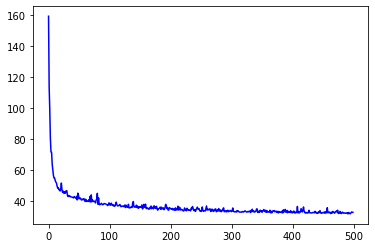

In [15]:
# 시각화
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

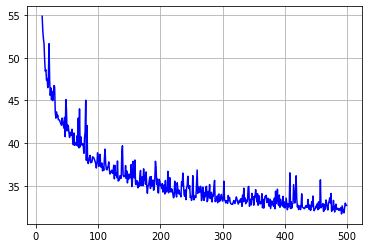

In [16]:
# 시각화
loss = history.history['loss']
epochs = range(10,len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.grid()
plt.show()

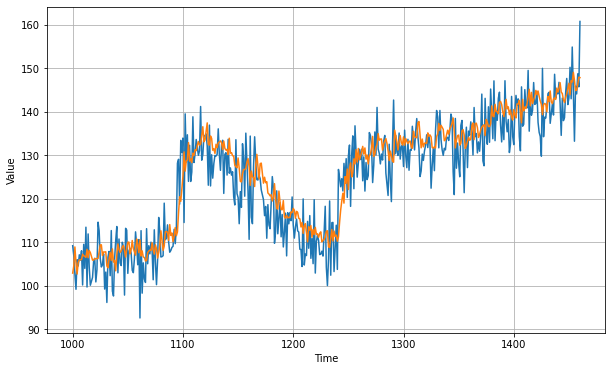

In [17]:
# 예측
forcast = []
for time in range(len(series) - window_size):  # 1431회 예측
    forcast.append(model.predict(series[time:time + window_size][np.newaxis]))
forcast = forcast[split_time - window_size:]    
results = np.array(forcast)[:,0,0]

# 시각화
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)  # 실제값
plot_series(time_valid,results)  # 예측값
plt.show()

In [18]:
# 평가
tf.keras.metrics.mean_absolute_error(x_valid,results).numpy() # 4.7950788
# 큰 개선 없음

4.7950788